# MadMiner particle physics tutorial

# Part 4b: The Fisher information

Johann Brehmer, Felix Kling, Irina Espejo, and Kyle Cranmer 2018-2019

## 0. Preparations

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import six
import logging
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

from madminer.fisherinformation import FisherInformation
from madminer.plotting import plot_fisher_information_contours_2d


In [2]:
# MadMiner output
logging.basicConfig(
    format='%(asctime)-5.5s %(name)-20.20s %(levelname)-7.7s %(message)s',
    datefmt='%H:%M',
    level=logging.INFO
)

# Output of all other modules (e.g. matplotlib)
for key in logging.Logger.manager.loggerDict:
    if "madminer" not in key:
        logging.getLogger(key).setLevel(logging.WARNING)

## 1. Calculating the Fisher information

We can use SALLY estimators (see part 3b of this tutorial) not just to define optimal observables, but also to calculate the (expected) Fisher information in a process. In `madminer.fisherinformation` we provide the `FisherInformation` class that makes this more convenient.

In [3]:
fisher = FisherInformation('data/lhe_data_shuffled.h5')
# fisher = FisherInformation('data/delphes_data_shuffled.h5')

15:06 madminer.analysis    INFO    Loading data from data/lhe_data_shuffled.h5
15:06 madminer.analysis    INFO    Found 2 parameters
15:06 madminer.analysis    INFO    Did not find nuisance parameters
15:06 madminer.analysis    INFO    Found 6 benchmarks, of which 6 physical
15:06 madminer.analysis    INFO    Found 3 observables
15:06 madminer.analysis    INFO    Found 15117 events
15:06 madminer.analysis    INFO      10004 signal events sampled from benchmark sm
15:06 madminer.analysis    INFO      1080 signal events sampled from benchmark w
15:06 madminer.analysis    INFO      1207 signal events sampled from benchmark neg_w
15:06 madminer.analysis    INFO      1399 signal events sampled from benchmark ww
15:06 madminer.analysis    INFO      1427 signal events sampled from benchmark neg_ww
15:06 madminer.analysis    INFO    Found morphing setup with 6 components
15:06 madminer.analysis    INFO    Did not find nuisance morphing setup


This class provides different functions:
- `rate_information()` calculates the Fisher information in total rates,
- `histo_information()` calculates the Fisher information in 1D histograms,
- `histo_information_2d()` calculates the Fisher information in 2D histograms,
- `full_information()` calculates the full detector-level Fisher information using a SALLY estimator, and
- `truth_information()` calculates the truth-level Fisher information.

Here we use the SALLY approach:

In [8]:
fisher_information, _ = fisher.full_information(
    theta=[0.,0.],
    model_file='models/sally',
    luminosity=30000.,
)

print('Fisher information after 30 ifb:\n{}'.format(fisher_information))

15:06 madminer.fisherinfor INFO    Found 2 parameters in SALLY model, matching 2 physical parameters in MadMiner file
15:06 madminer.fisherinfor INFO    Evaluating rate Fisher information
15:07 madminer.fisherinfor INFO    Evaluating kinematic Fisher information on batch 1 / 1


Fisher information after 30 ifb:
[[1.68106271 0.31712457]
 [0.31712457 1.55818051]]


For comparison, we can calculate the Fisher information in the histogram of observables:

In [9]:
info_histo_1d, cov_histo_1d = fisher.histo_information(
    theta=[0.,0.],
    luminosity=30000.,
    observable="pt_j1",
    bins=[30.,100.,200.,400.],
    histrange=[30.,400.],
)

print('Histogram Fisher information after 30 ifb:\n{}'.format(info_histo_1d))

15:07 madminer.fisherinfor INFO    Bins with largest statistical uncertainties on rates:
15:07 madminer.fisherinfor INFO      Bin 1: (0.00351 +/- 0.00063) fb (18 %)
15:07 madminer.fisherinfor INFO      Bin 5: (0.00063 +/- 0.00008) fb (13 %)
15:07 madminer.fisherinfor INFO      Bin 4: (0.01047 +/- 0.00040) fb (4 %)
15:07 madminer.fisherinfor INFO      Bin 3: (0.06518 +/- 0.00208) fb (3 %)
15:07 madminer.fisherinfor INFO      Bin 2: (0.12215 +/- 0.00338) fb (3 %)


Histogram Fisher information after 30 ifb:
[[1.30731745 0.03891929]
 [0.03891929 0.00223523]]


We can do the same thing in 2D:

In [10]:
info_histo_2d, cov_histo_2d = fisher.histo_information_2d(
    theta=[0.,0.],
    luminosity=30000.,
    observable1="pt_j1",
    bins1=[30.,100.,200.,400.],
    histrange1=[30.,400.],
    observable2="delta_phi_jj",
    bins2=5,
    histrange2=[0.,6.2],
)

print('Histogram Fisher information after 30 ifb:\n{}'.format(info_histo_2d))

15:07 madminer.fisherinfor INFO    Bins with largest statistical uncertainties on rates:
15:07 madminer.fisherinfor INFO      Bin (1, 2): (0.00086 +/- 0.00040) fb (47 %)
15:07 madminer.fisherinfor INFO      Bin (6, 5): (0.00009 +/- 0.00004) fb (38 %)
15:07 madminer.fisherinfor INFO      Bin (7, 1): (0.00011 +/- 0.00003) fb (29 %)
15:07 madminer.fisherinfor INFO      Bin (7, 2): (0.00017 +/- 0.00004) fb (26 %)
15:07 madminer.fisherinfor INFO      Bin (1, 1): (0.00187 +/- 0.00047) fb (25 %)


Histogram Fisher information after 30 ifb:
[[1.48659626 0.04828435]
 [0.04828435 1.33096885]]


## 2. Plot Fisher distances

We also provide a convenience function to plot contours of constant Fisher distance `d^2(theta, theta_ref) = I_ij(theta_ref) * (theta-theta_ref)_i * (theta-theta_ref)_j`:

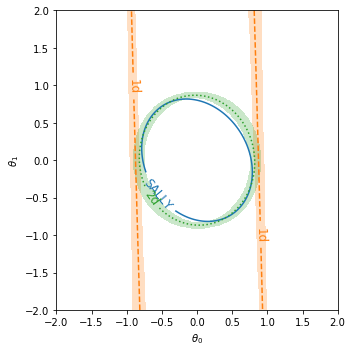

In [13]:
_ = plot_fisher_information_contours_2d(
    [fisher_information, info_histo_1d, info_histo_2d],
    [None, cov_histo_1d, cov_histo_2d],
    inline_labels=["SALLY", "1d", "2d"],
    xrange=(-2,2),
    yrange=(-2,2)
)